### A Study of how time, day, month and year can affect the amount of car crashes in the USA.
Based on the dataset "US_Accidents_March23.csv" a study of US Accidents (2016 - 2023) from the source: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/data

In [19]:
#import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
#load in the dataset into a panda dataframe (note it is big so will take some time)
df = pd.read_csv("US_Accidents_March23.csv")  
#check shape and first few rows 920305
print(df.shape)
df.head()

(7728394, 46)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
#Check what one instance looks like
df.loc[2]

ID                                                                     A-3
Source                                                             Source2
Severity                                                                 2
Start_Time                                             2016-02-08 06:49:27
End_Time                                               2016-02-08 07:19:27
Start_Lat                                                        39.063148
Start_Lng                                                       -84.032608
End_Lat                                                                NaN
End_Lng                                                                NaN
Distance(mi)                                                          0.01
Description              Accident on OH-32 State Route 32 Westbound at ...
Street                                                      State Route 32
City                                                          Williamsburg
County                   

In [4]:
#check for how many missing values
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [5]:
#check start time variable type we will use this for graphing
df['Start_Time'].dtypes

dtype('O')

In [6]:
#general info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [7]:
#change start time to datetime type for 
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")

#### This bar chart shows the amount of car crashes per hour of day. 
From this we see that most crashes occur between 6-8 am and 3 - 6 pm. These are traditionally considered rush hour, when most people are commuting to and from work and school. This is usually when roads are busiest and reflects in this data as that is when there are the most amount of car crashes.

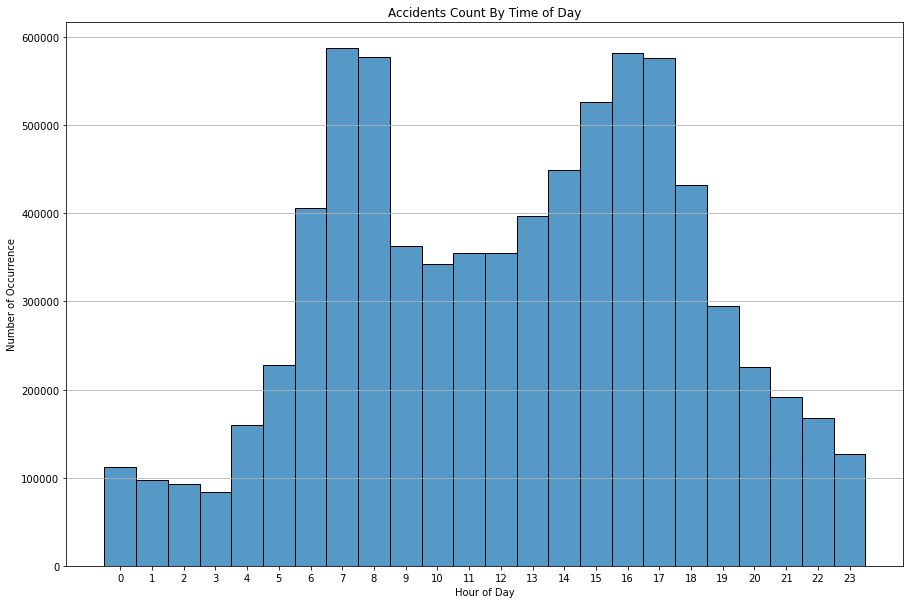

In [8]:
#Histogram for crashes on every hour of day
fig, ax = plt.subplots(figsize=(15,10))

sns.histplot(
    df['Start_Time'].dt.hour,
    bins = 24,
    discrete = True,
    ax = ax
)

ax.set_xticks(range(24))
ax.ticklabel_format(style = 'plain', axis = 'y')

plt.grid(axis = 'y')

plt.xlabel("Hour of Day")
plt.ylabel("Number of Occurrence")
plt.title('Accidents Count By Time of Day')

plt.show()

#### Distribution of crashes based on the year
This shows that the number of crashes is increasing each year. (Note that 2023 is an outlier as the data collection stops in march, 2016 is a slihght outlier as it only starts to collect data from February)

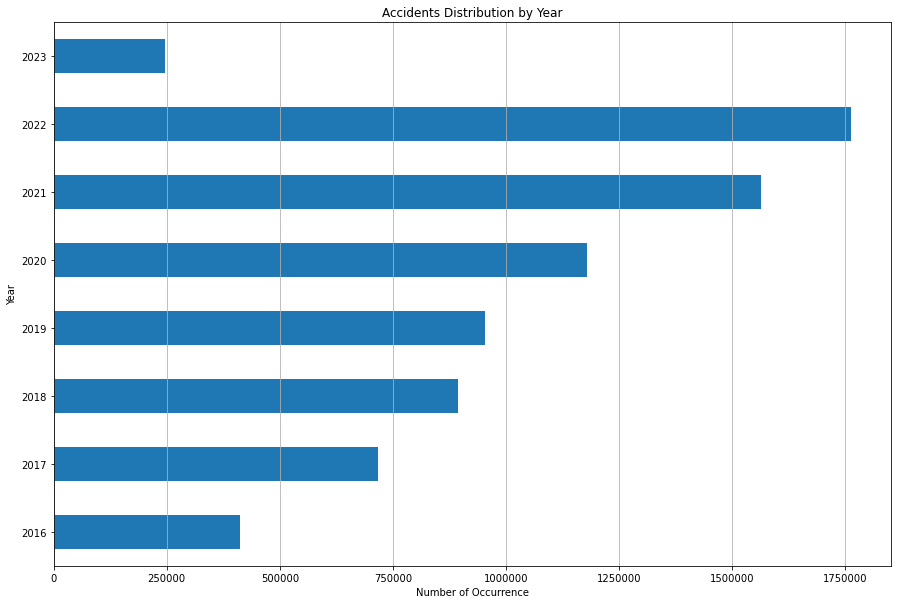

In [16]:
#horizontal bar chart showing distrbution of crashes through the years
year_counts = df['Start_Time'].dt.year.value_counts().sort_index()

fig, ax = plt.subplots(figsize =( 15,10))

year_counts.plot(kind = 'barh', ax = ax)

ax.set_ylabel("Year")
ax.set_xlabel("Number of Occurrence")
ax.set_title('Accidents Distribution by Year')

ax.ticklabel_format(style = 'plain', axis = 'x')

plt.grid(axis = 'x')

plt.show()

#### This graph shows the distribution of car crashes based on the day of the week. 
From this we can see that the weekend has less crashes, I would presume this is because there are less cars on the road as less people are communiting to and from work/school.

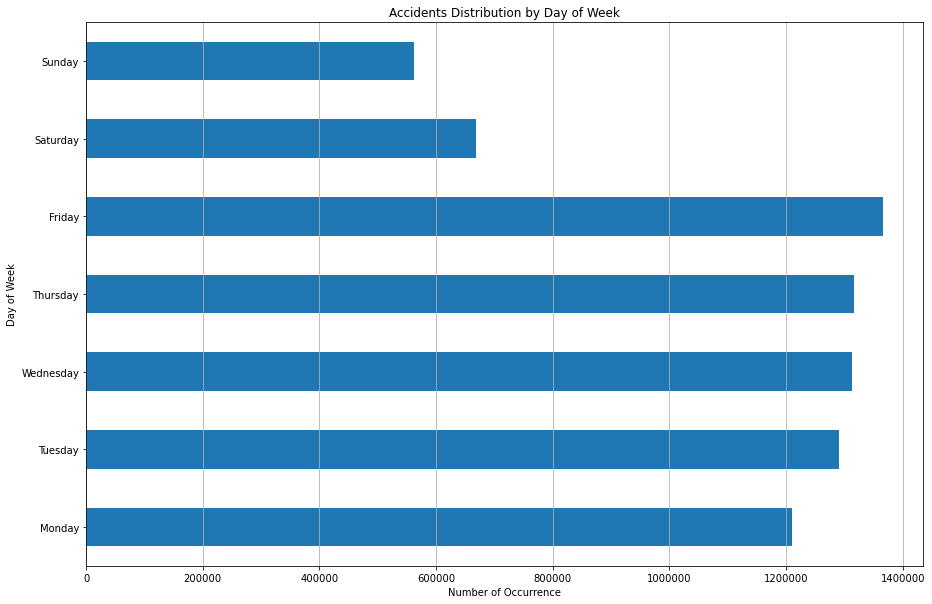

In [17]:
# Count accidents by day of week horizontal bar chart
day_counts = df['Start_Time'].dt.day_name().value_counts()

# Reorder to normal week order
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_counts = day_counts.reindex(day_order)

fig, ax = plt.subplots(figsize = (15,10))

day_counts.plot(kind = 'barh', ax = ax)

ax.set_ylabel("Day of Week")
ax.set_xlabel("Number of Occurrence")
ax.set_title('Accidents Distribution by Day of Week')

ax.ticklabel_format(style = 'plain', axis = 'x')

plt.grid(axis = ' x')

plt.show()

#### This barchart shows the distribution of car crashes based on the month. 
Shows that more crashes occur in the winter I would presume this would be linked with a number of factors such as weather, visibility and more people using cars over walking and cycling. (Note I dropped 2023 as the data collected stops in March thus creating inaccurate values for the counts.)

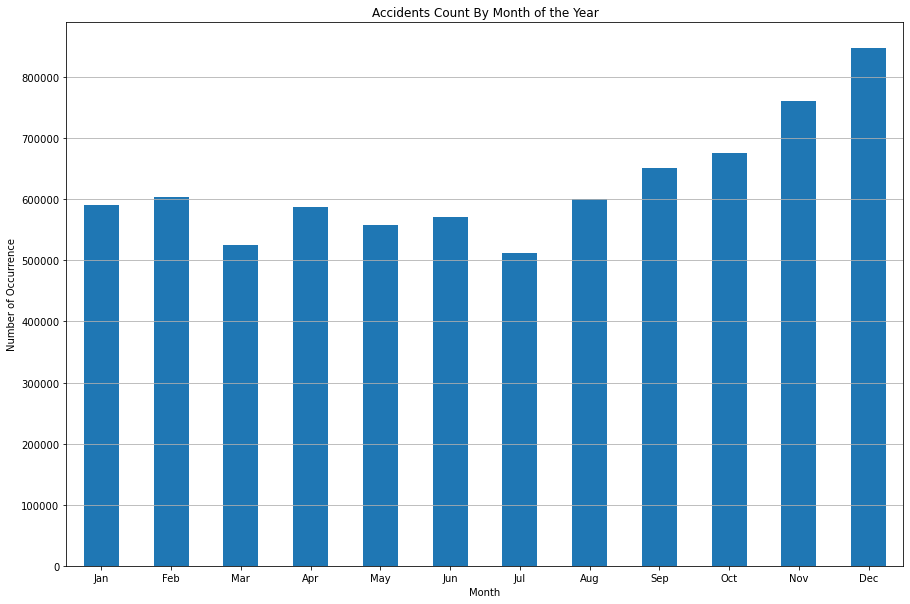

In [21]:
#filter out 2023 data
df_filtered = df[df['Start_Time'].dt.year != 2023]

#plot the months of the year in a bar chart
fig, ax = plt.subplots(figsize=(15,10))

month_counts = df_filtered['Start_Time'].dt.month.value_counts().sort_index()

# Convert month numbers into month names
month_counts.index = [calendar.month_abbr[m] for m in month_counts.index]

month_counts.plot(kind = 'bar', ax = ax)

ax.ticklabel_format(style='plain', axis = 'y')

plt.xticks(rotation = 0)

plt.grid(axis = 'y')

plt.xlabel("Month")
plt.ylabel("Number of Occurrence")
plt.title('Accidents Count By Month of the Year')

plt.show()

In [22]:
#drop all missing values
Sunrise_Sunset_Counts = df['Sunrise_Sunset'].dropna().value_counts()
Civil_Twilight_Counts = df['Civil_Twilight'].dropna().value_counts()
Nautical_Twilight_Counts = df['Nautical_Twilight'].dropna().value_counts()
Astronomical_Twilight_Counts = df['Astronomical_Twilight'].dropna().value_counts()

In [23]:
#check
Sunrise_Sunset_Counts.isna().sum()

0

In [24]:
#check
Civil_Twilight_Counts.isna().sum()

0

In [25]:
#check
Nautical_Twilight_Counts.isna().sum()

0

In [26]:
#check
Astronomical_Twilight_Counts.isna().sum()

0

#### Studying the amount of car crashes based on day and night from multiple efinitions of day and night. 
From these donut graphs we see that there are more crashes during the day over night, I would suggest this is due to there being more cars on the road during the day.

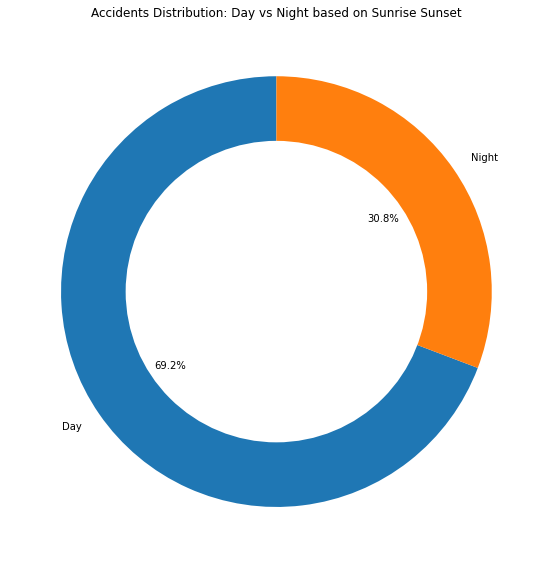

In [27]:
# Day vs Night based on Sunrise Sunset
Sunrise_Sunset_Counts = df['Sunrise_Sunset'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))

# Create pie
wedges, texts, autotexts = ax.pie(
    Sunrise_Sunset_Counts,
    labels = Sunrise_Sunset_Counts.index,
    autopct = '%1.1f%%',
    startangle = 90
)

# Create donut hole
centre_circle = plt.Circle((0, 0), 0.70, fc = 'white')
fig.gca().add_artist(centre_circle)

ax.set_title('Accidents Distribution: Day vs Night based on Sunrise Sunset')

plt.tight_layout()
plt.show()

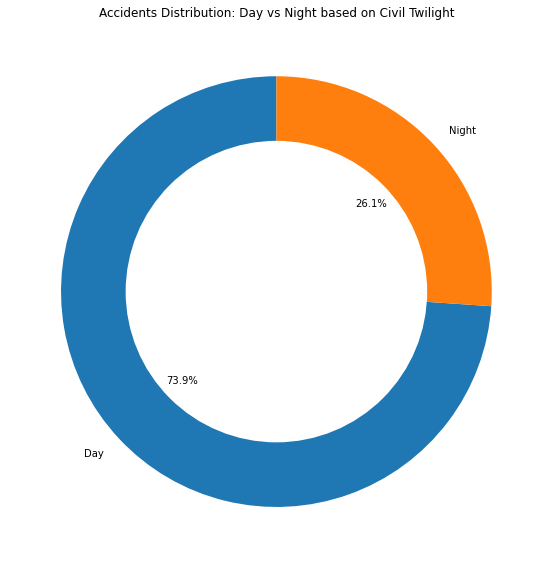

In [28]:
# Day vs Night based on Civil Twilight
Civil_Twilight_Counts = df['Civil_Twilight'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))

# Create pie
wedges, texts, autotexts = ax.pie(
    Civil_Twilight_Counts,
    labels = Civil_Twilight_Counts.index,
    autopct = '%1.1f%%',
    startangle = 90
)

# Create donut hole
centre_circle = plt.Circle((0, 0), 0.70, fc = 'white')
fig.gca().add_artist(centre_circle)

ax.set_title('Accidents Distribution: Day vs Night based on Civil Twilight')

plt.tight_layout()
plt.show()

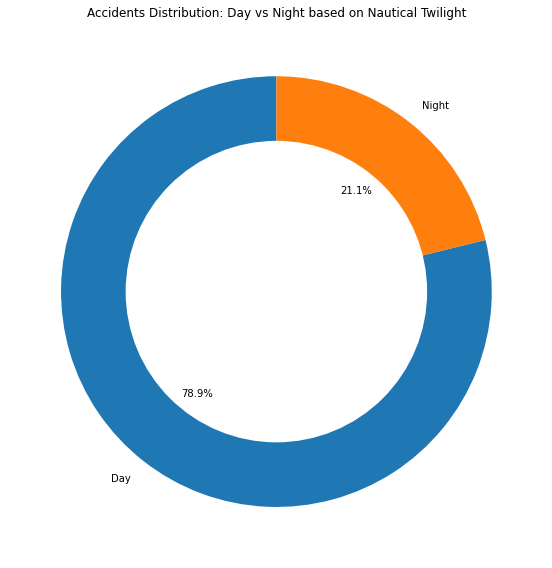

In [29]:
# Day vs Night based on Nautical Twilight
Nautical_Twilight_Counts = df['Nautical_Twilight'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))

# Create pie
wedges, texts, autotexts = ax.pie(
    Nautical_Twilight_Counts,
    labels = Nautical_Twilight_Counts.index,
    autopct = '%1.1f%%',
    startangle = 90
)

# Create donut hole
centre_circle = plt.Circle((0, 0), 0.70, fc = 'white')
fig.gca().add_artist(centre_circle)

ax.set_title('Accidents Distribution: Day vs Night based on Nautical Twilight')

plt.tight_layout()
plt.show()

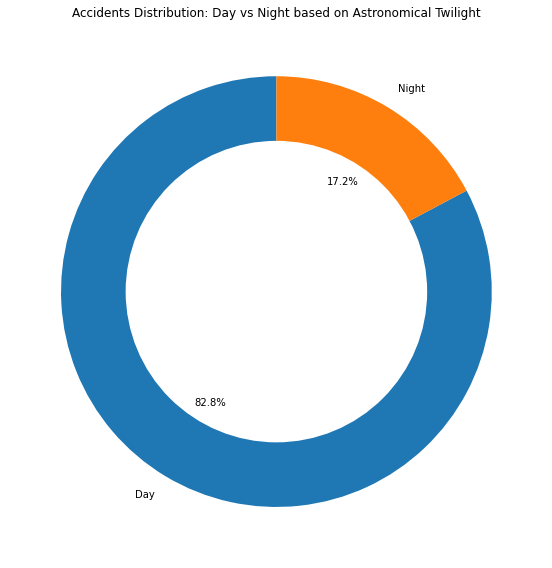

In [30]:
# Day vs Night based on Nautical Twilight
Astronomical_Twilight_Counts = df['Astronomical_Twilight'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))

# Create pie
wedges, texts, autotexts = ax.pie(
    Astronomical_Twilight_Counts,
    labels = Astronomical_Twilight_Counts.index,
    autopct = '%1.1f%%',
    startangle = 90
)

# Create donut hole
centre_circle = plt.Circle((0, 0), 0.70, fc = 'white')
fig.gca().add_artist(centre_circle)

ax.set_title('Accidents Distribution: Day vs Night based on Astronomical Twilight')

plt.tight_layout()
plt.show()